# Gradient Boosted Trees

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
maldata=pd.read_csv('../../Data/malware.csv',sep='|')

x=maldata.drop(['Name', 'md5', 'legitimate'], axis=1).values
y=maldata['legitimate'].values

feature_select_model=ExtraTreesClassifier()
feature_select_model.fit(x,y)
model = SelectFromModel(feature_select_model, prefit=True)
x=model.transform(x)

number_of_samples=len(y)

random_indices=np.random.permutation(number_of_samples)

num_train=int(number_of_samples*0.7)
num_test=int(number_of_samples*0.30)

x_train=x[random_indices[:num_train]]
y_train=y[random_indices[:num_train]]

x_test=x[random_indices[num_train:]]
y_test=y[random_indices[num_train:]]

model=GradientBoostingClassifier()
model.fit(x_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## Accuracy

In [3]:
y_predtrain=model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_predtrain)*100)

y_predtest=model.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_predtest)*100)

('Train Accuracy:', 98.933065651130065)
('Test Accuracy:', 98.92309549680067)


## Null Accuracy

In [4]:
print(max(y_test.mean(), 1 - y_test.mean())*100)

70.3320053121


## Confusion Matrix

In [5]:
confusion=confusion_matrix(y_test,y_predtest)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

('Accuracy:', 98.92309549680067)
('Misclassification:', 1.0769045031993238)
('Sensitivity:', 98.095548140310896)
('Specificty:', 99.272177973084325)
('False Positive:', 0.72782202691568254)
('Precision Score:', 98.271504280472882)


## ROC-AUC

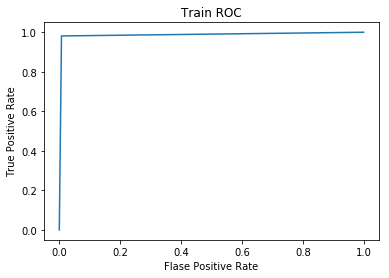

('Train AUC:', 98.703985745771064)


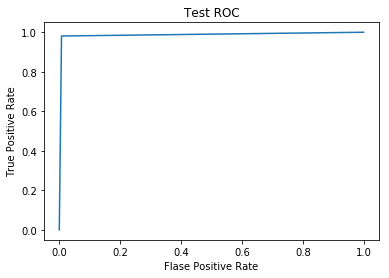

('Test AUC:', 98.683863056697604)
('Mean Cross-Val AUC Score:', 99.805524278843961)


In [6]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_predtrain)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()

print("Train AUC:",metrics.roc_auc_score(y_train,y_predtrain)*100)



fpr,tpr,threshold=metrics.roc_curve(y_test,y_predtest)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,y_predtest)*100)



print("Mean Cross-Val AUC Score:",cross_val_score(model, x, y, cv=10, scoring='roc_auc').mean()*100)

## Parameter Tuning

1) n_estimators: # of small trees to use in ensemble

2) learning_rate: controls emphasis on fixing errors from previous iteration

3) max_depth: Usually set to 3-5  

In [7]:
param_grid={   
    "n_estimators" : [100,300],
    "max_depth" : [3,4,5],
    "min_samples_leaf" : [40,50]
}

In [8]:
tuned_classifier=GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
tuned_classifier.fit(x,y)

print(tuned_classifier.best_score_)
print(tuned_classifier.best_params_)
print(tuned_classifier.best_estimator_)

0.984577716285
{'n_estimators': 100, 'max_depth': 3, 'min_samples_leaf': 50}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


## Train model with best parameters

In [10]:
model=GradientBoostingClassifier(**tuned_classifier.best_params_)
model.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

# Results

In [11]:
y_predtrain=model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_predtrain)*100)

y_predtest=model.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_predtest)*100)

('Train Accuracy:', 98.900985180892448)
('Test Accuracy:', 98.937583001328022)


In [12]:
confusion=confusion_matrix(y_test,y_predtest)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

('Accuracy:', 98.937583001328022)
('Misclassification:', 1.0624169986719787)
('Sensitivity:', 98.095548140310896)
('Specificty:', 99.292776709695147)
('False Positive:', 0.70722329030486131)
('Precision Score:', 98.319601925116245)


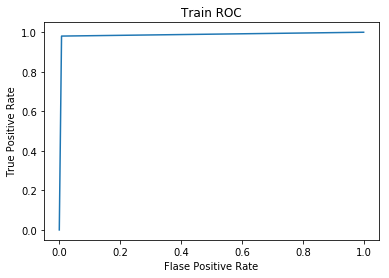

('Train AUC:', 0.98661409164131875)


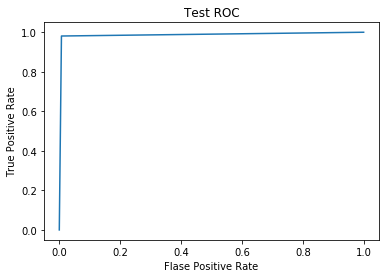

('Test AUC:', 0.98694162425003018)


In [13]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_predtrain)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()

print("Train AUC:",metrics.roc_auc_score(y_train,y_predtrain))



fpr,tpr,threshold=metrics.roc_curve(y_test,y_predtest)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,y_predtest))